<a href="https://colab.research.google.com/github/osienka/NLP/blob/main/ASL/NLP_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Final NLP assgnment

Zofia Hendrysiak

In this project I created a model to recognize images presenting American Sign Language signs. The dataset I used comes from Kaggle. My goal was to train the model so it can differenciate every character from ASL alphabet.

In [1]:
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
import statistics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, RandomRotation

seed = 128
rng = np.random.RandomState(seed)

In [2]:
#getting the data
!git clone 
!unzip archive\(3\).zip;

Archive:  archive(3).zip
replace archive(3)/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: archive(3)/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_bot_seg_2_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_bot_seg_3_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_bot_seg_4_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_bot_seg_5_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_dif_seg_1_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_dif_seg_2_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_dif_seg_3_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_dif_seg_4_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_dif_seg_5_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_left_seg_1_cropped.jpeg  
  inflating: archive(3)/asl_dataset/0/hand1_0_left_seg_2_cropped.jpeg  
  inflating: arc

The 0 sign
(400, 400)


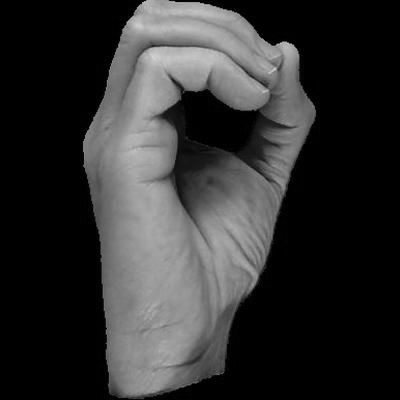

In [3]:
# Checking files 
files = os.listdir('/content/archive(3)/asl_dataset/')
# Path to one of the images
path = os.path.join('/content/archive(3)/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg')
img = load_img(path, color_mode='grayscale')

# Showing one of signs presenting 0
print('The 0 sign')
img_arr = np.asarray(img)
print(img_arr.shape)
inputShape = img_arr.shape
img

In [4]:
#loading data
def load_data(folder, height, width, color):    
    '''
    load images from 'folder' which contains subfolders as labels
    returns vectors X (inputs) and Y (labels) ready for training/testing
    '''
    # list of all subfolders but hidden files
    list_labels = [f for f in os.listdir(folder)]

    X = [] # vector of images
    Y = [] # vector of labels

    for label in list_labels:
        current_dir = os.path.join(folder, label)
        for img_file in os.listdir(current_dir):
            if not img_file.startswith('.'):
                img = load_img(os.path.join(current_dir, img_file), color_mode=color, target_size=(height, width))
                X.append(np.array(img)/255)
                if len(label) > 1:
                  Y.append(26)
                elif ord(label) >= 48 and ord(label) <= 57:
                  Y.append(label)
                else:
                  Y.append(ord(label) - ord('a') + 10)

    X = np.array(X).reshape(-1, height, width, 1)          
    Y = to_categorical(Y, 36)
    return X, Y                        


# Size of the image and the color
height = 100
width = 100
color = 'grayscale'

# Load and transform images
X, Y = load_data('/content/archive(3)/asl_dataset', height, width, color)

I checked distribution of data in each set. I wanted to know if the data is splitted in even way. The distribution is shown on the plots below.

I came to a conclusion that the dataset is splitted in rigth way.

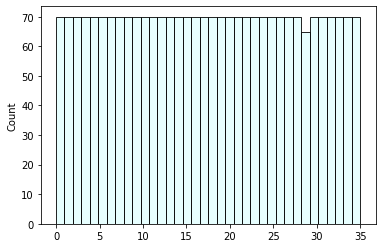

In [26]:
import seaborn as sns
sns.histplot([i for i in range(36) for j in range(len(Y)) if Y[j,i] == 1], bins=36, color = "lightcyan")

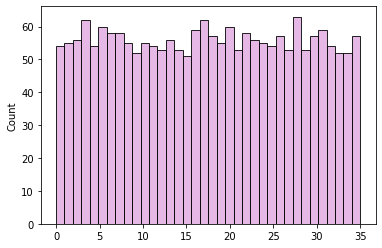

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 354)

sns.histplot([i for i in range(36) for j in range(len(Y_train)) if Y_train[j,i] == 1], bins=36, color = "plum")

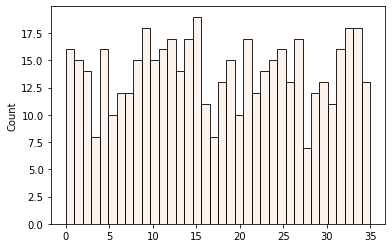

In [32]:
sns.histplot([i for i in range(36) for j in range(len(Y_test)) if Y_test[j,i] == 1], bins=36, color = "linen")

**Model**

Here is the part in which model is created. It has two convolutional, maxpooling and dropout layers. It also has a layer that is rotating the image a bit. At the end the model flattens the data and has one more - this time dense - layer.

In [11]:
# Cnn model

model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(height, width, 1)))
model.add(MaxPooling2D(pool_size = (3,3))) 
model.add(Dropout(0.25))
model.add(RandomRotation(factor=(-0.05,0.05)))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = (3,3))) 
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(len(Y[0]), activation='softmax'))

model.summary()


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Save training to 'mymodel'
mymodel = model.fit(X_train, Y_train, epochs = 10, validation_split = 0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 random_rotation_1 (RandomRo  (None, 32, 32, 32)       0         
 tation)                                                         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 64)        

Test loss: 0.19263963401317596
Test accuracy: 0.942345917224884


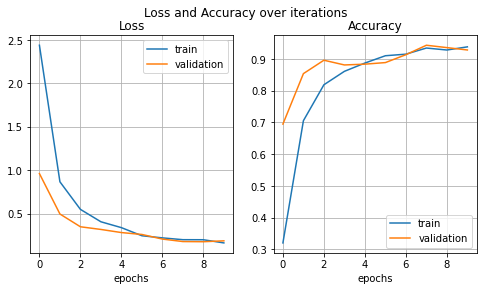

In [12]:
# PLOT LOSS AND ACCURACY HISTORY
def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Loss and Accuracy over iterations')
    
    # add_subplot(nrows, ncolumns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Loss')
    ax.legend(['train', 'validation'], loc='upper right')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.legend(['train', 'validation'], loc='lower right')

plot_loss_accuracy(mymodel.history['loss'], 
                   mymodel.history['val_loss'], 
                   mymodel.history['accuracy'], 
                   mymodel.history['val_accuracy'])

# TEST MODEL
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

**Evaluation**

Here is the evaluation of the model on testing data. As shown above the model is getting quite low loss and quite high accuracy. As I'm aware just 10 epochs is not so much for a model like this. Also we can see on plots above that the model is still learning but slowly so if we add more epochs it will probably overfit the data.

For testing data the model is also getting really high scores. The accuracy is as high as 94% and ROC AUC score is nearly 97% which is great. It shows that the model is trained well and doesn't overfit the data 

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       1.00      0.93      0.97        15
           2       0.63      1.00      0.78        19
           3       1.00      1.00      1.00        12
           4       0.86      0.86      0.86        14
           5       0.83      0.77      0.80        13
           6       0.80      1.00      0.89        12
           7       1.00      1.00      1.00        11
           8       1.00      0.94      0.97        17
           9       0.94      1.00      0.97        15
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        15
          13       0.94      1.00      0.97        16
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12
    

<Figure size 432x288 with 0 Axes>

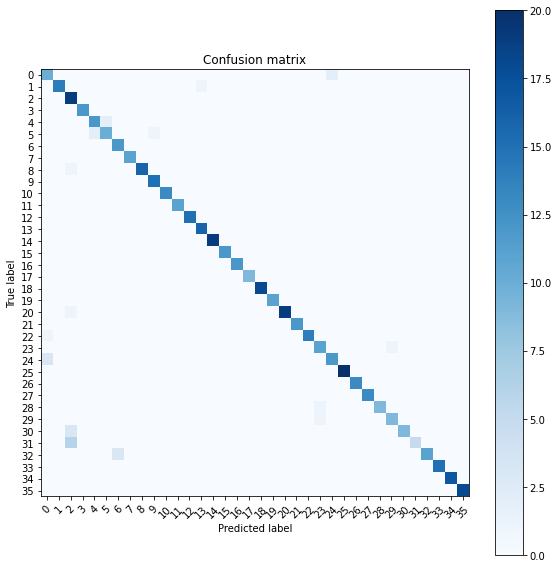

<Figure size 432x288 with 0 Axes>

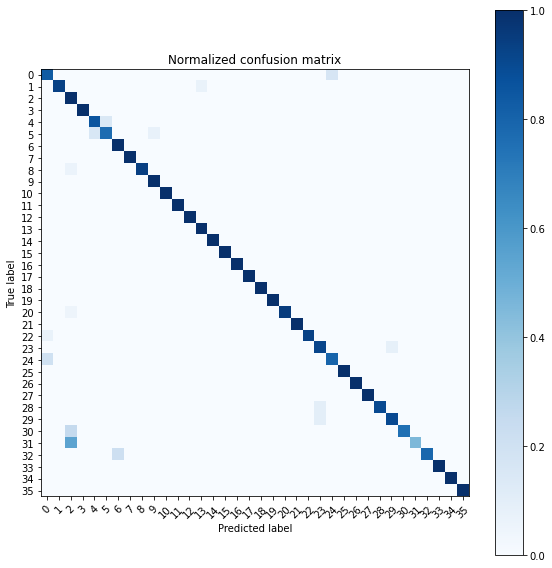

In [13]:
## Confusion matrix and other metrics
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def printScores(model, X, Y):
    # Computing the metrics
    print("Classification report:")
    y_predict = np.argmax(model.predict(X), axis=1)
    print(classification_report(Y, y_predict))
    # Computing confusion matrix
    cm = confusion_matrix(Y, y_predict)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm, [i for i in range(36)])

    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    print(cm_normalized)
    plt.figure()
    plot_confusion_matrix(cm_normalized, [i for i in range(36)], title='Normalized confusion matrix')

    plt.show()
    
printScores(model, X_test, np.argmax(Y_test, axis=1)) 

ROC AUC score: 0.9675696993530243


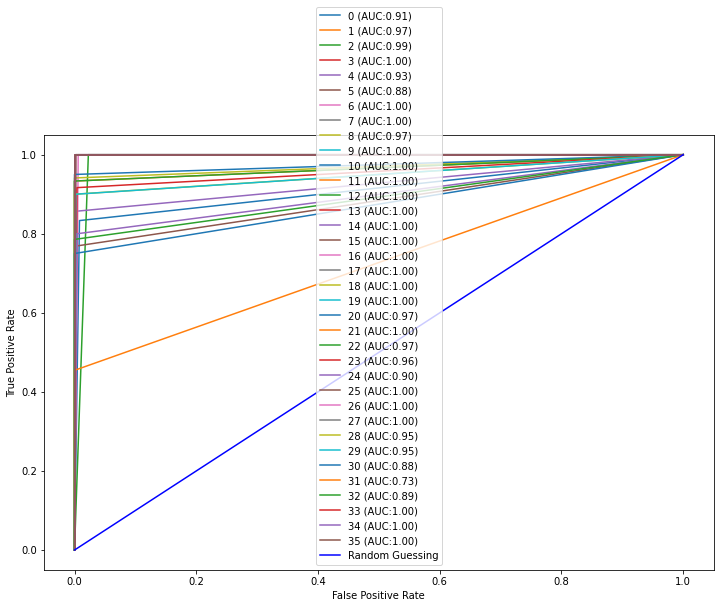

In [14]:
#roc-auc score
target = [i for i in range(36)]
Y_pred = model.predict(X_test).argmax(axis=1)

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(Y_test, Y_pred))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

**Another evaluation**

This time on generated data - images that are a bit rotated or shifted.

In [23]:
epochs = 5
datagen = ImageDataGenerator(
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=0.05,
    validation_split=0.2)

datagen.fit(X_train)
# fits the model on batches:
model.fit(datagen.flow(X_train, Y_train, batch_size=32,  save_to_dir="/content/generated", 
         save_prefix='generowane', save_format='png',
         subset='training'),
         validation_data=datagen.flow(X_train, Y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(X_train) / 32, epochs=epochs)


Epoch 1/5
62/62 [==============================] - 5s 86ms/step - loss: 1.8651 - accuracy: 0.4242 - val_loss: 1.5386 - val_accuracy: 0.5274


Classification report:
              precision    recall  f1-score   support

           0       0.38      0.83      0.53        12
           1       0.71      1.00      0.83        15
           2       0.00      0.00      0.00        19
           3       1.00      0.67      0.80        12
           4       0.91      0.71      0.80        14
           5       0.86      0.92      0.89        13
           6       0.16      0.25      0.19        12
           7       1.00      0.55      0.71        11
           8       0.92      0.65      0.76        17
           9       0.88      1.00      0.94        15
          10       1.00      0.15      0.27        13
          11       1.00      1.00      1.00        11
          12       0.88      1.00      0.94        15
          13       1.00      0.88      0.93        16
          14       1.00      0.11      0.19        19
          15       1.00      1.00      1.00        12
          16       0.65      0.92      0.76        12
    

<Figure size 432x288 with 0 Axes>

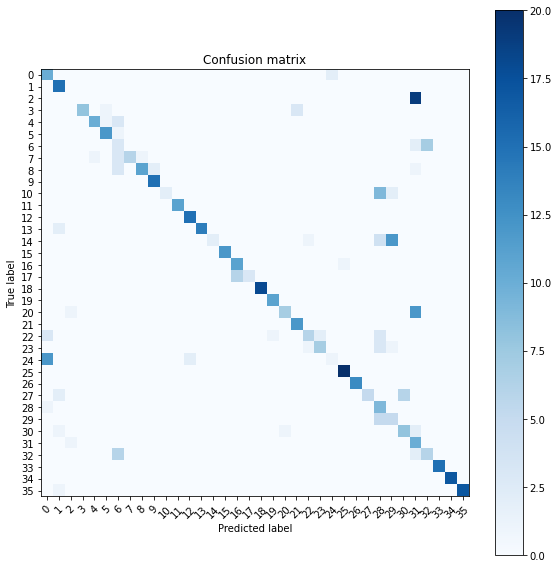

<Figure size 432x288 with 0 Axes>

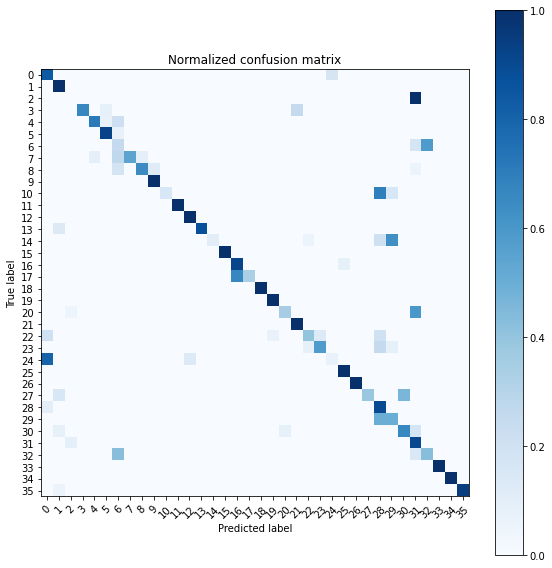

ROC AUC score: 0.8441630737908803


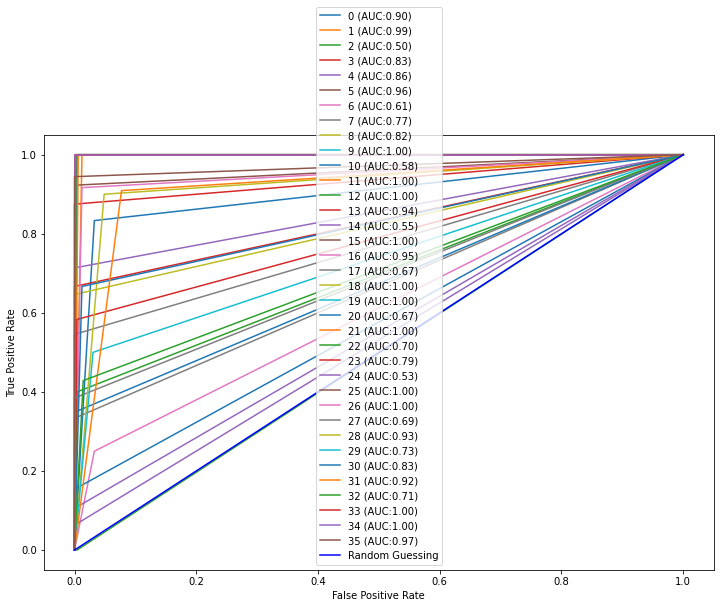

In [24]:
printScores(model, X_test, np.argmax(Y_test, axis=1)) 
pred = model.predict(X_test)
pred = pred.argmax(axis=-1)
target = [i for i in range(36)]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

print('ROC AUC score:', multiclass_roc_auc_score(Y_test, pred))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

**Conclusions**

The dataset is ideal and when images are a bit worse the predictions also fallow the quality. It doesn't matter for all the characters but for some of them it unfortunatelly does. Maybe it's because those shouldn't really be changed. The changed data is confusing for model but it still manages to get ROC AUC Score nearly 85% which is - as I believe - quite high for such a change in the dataset. So after all the model is working quite well. Maybe it shuold get more data and the data shouldn't be so nice. But right now it's working and with such clean data we can be sure it recognizes the signs and not some noise in the background.